# PYTHON PROGRAMMING FUNDAMENTALS 


# STEP 0: 데이터셋

- 데이터는 미국의 아보카도 리테일 데이터 입니다. (weekly 2018 retail scan data for National retail volume (units) and price)
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. - 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost

컬럼 설명 :

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold 
- 4046 - Total number of avocados with PLU 4046 sold - PLU는 농산물 코드입니다
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

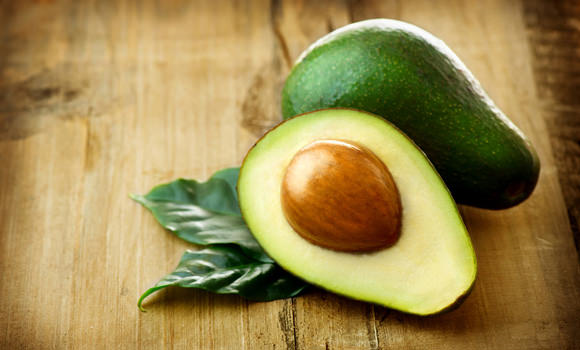

# STEP 1: 데이터 임포팅

##### 아나콘다 프롬프트를 실행합니다.

     
- 콘다로 설치합니다. : 

    conda install pystan
    
    conda install -c conda-forge fbprophet
    
    

- ( 다른 설치 )

    pip install fbprophet
    
    

##### Prophet 은 페이스북에서 만든 오픈소스소프트웨어 입니다.  

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet 시계열과 관련있는 데이터를 처리하는데 최고입니다. 

- 참고 : https://research.fb.com/prophet-forecasting-at-scale/
- 참고 : https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [2]:
# import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import seaborn as sb
from fbprophet import Prophet


### 위를 실행했을때, 다음과 같은 에러 발생하면,
ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.

### pip install --upgrade plotly  실행.

In [53]:
avocado_df = pd.read_csv('avocado.csv')

# 실습 1. Date 컬럼으로 정렬하기 (데이터를 확인해 보면, Date 가 뒤죽박죽입니다.)

In [54]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [55]:
# ascending = True : 오름차순 정렬
avocado_df = avocado_df.sort_values(by = 'Date', ascending = True)

In [56]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [57]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


# 실습 2. Date를 x축, AveragePrice를 y축으로 plot 그리세요.

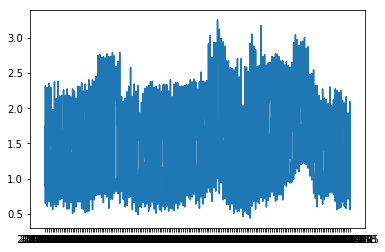

In [58]:
# plot를 그리되 X축은 Date, Y축은 AveragePrice
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

# 실습 3. 각 region 별로 몇개의 데이터가 있는지를 그래프로 나타내세요.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

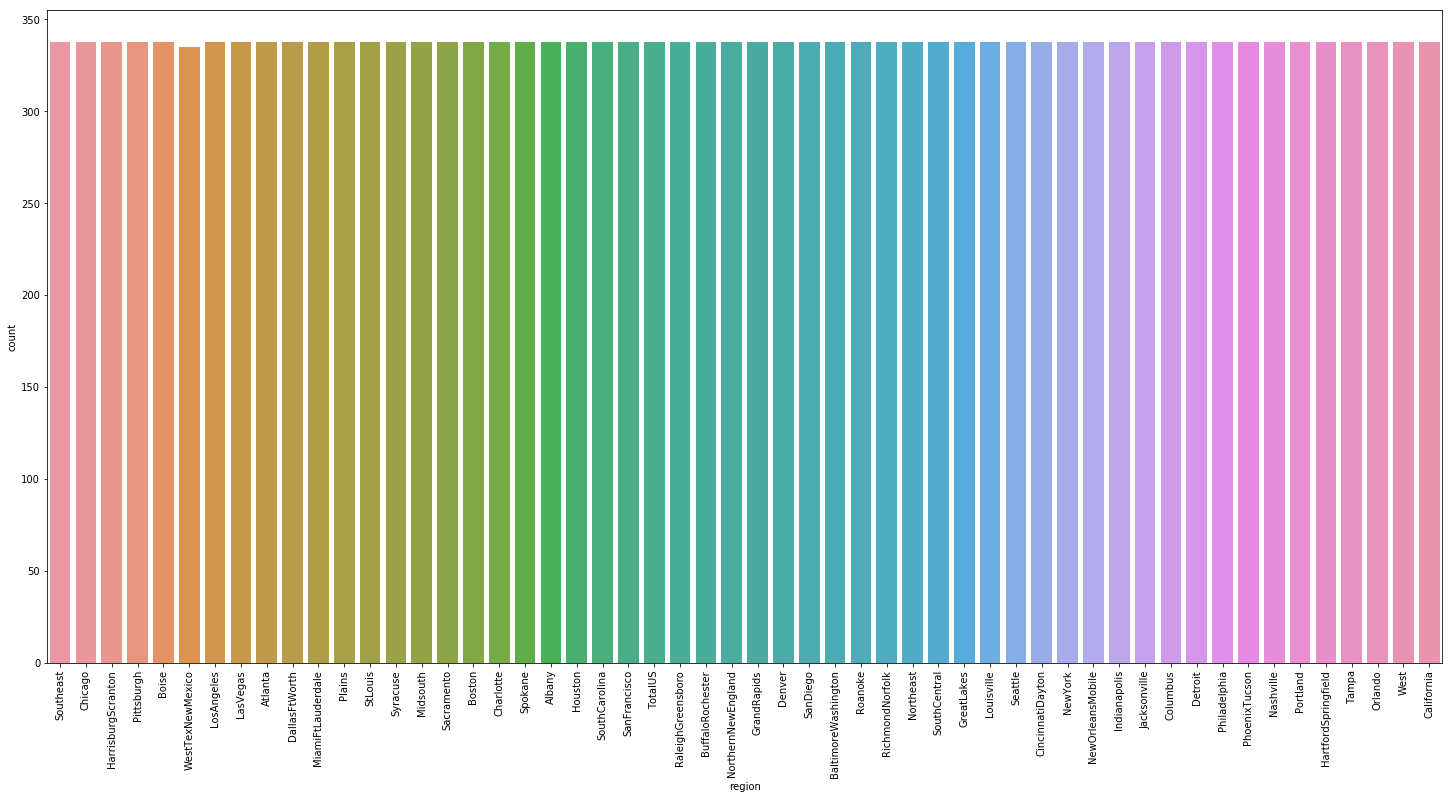

In [14]:
#일단, 그래프 사이즈 
plt.figure(figsize = [25, 12])

sb.countplot(data = avocado_df, x='region')
plt.xticks(rotation=90)

# 실습 4. 각 년도별로 몇개의 데이터가 있는지를 그래프로 나타내세요.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

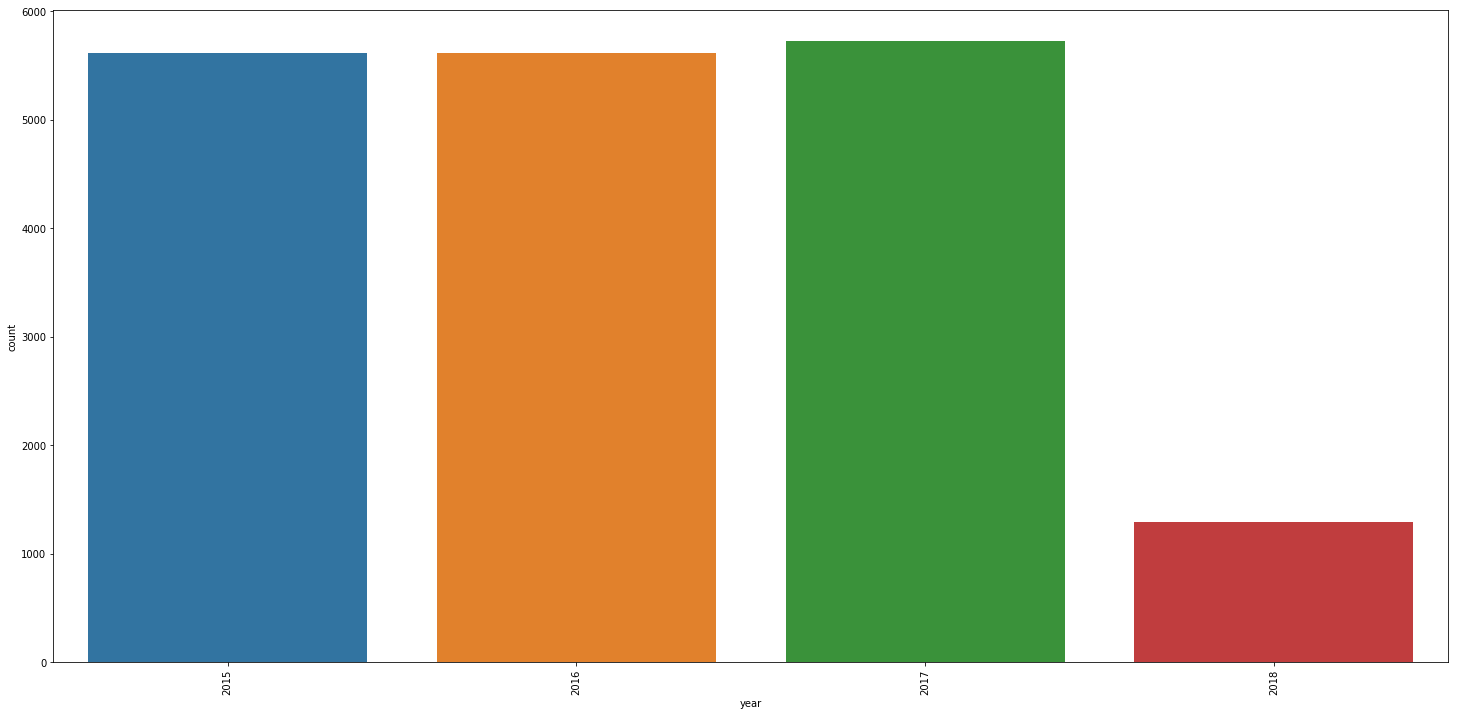

In [16]:
# 그래프 사이즈를 다음처럼 늘리겠습니다.
plt.figure(figsize=[25,12])

sb.countplot(data = avocado_df, x='year')
plt.xticks(rotation=90)




# 실습 5. Date 와 AveragePrice 두개의 열만 포함하는 데이터프레임을 만드세요.

In [22]:
# Date, AveragePrice 2개의 컬럼(열, column)만 남기고 나머지는 버린 데이터프레임을 만들어보자
# 원하는 컬럼에 대학 리스트[]를 만들자
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [24]:
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# Prophet 를 사용하여 예측하려 합니다. 그러려면, 컬럼명을 다음처럼 꼭 바꿔줘야 합니다.

# 실습 6. Date컬럼명을 ds로,  AveragePrice컬럼명을  y로 리네임(rename) 하세요.

In [44]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'})


In [45]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# .실습 7. Prophet 를 이용해서, 학습 시킵니다.

In [46]:
# Prophet을 이용해서 m 에 저장한다.
m = Prophet()

In [47]:
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# .실습 8. Prophet 를 이용해서, 미래를 예측합니다.

In [48]:
# 2018년 3월 25일까지만 존재하는 데이터에서, 이후 365일치를 예측한다.
future = m.make_future_dataframe(periods = 365)

In [49]:
future.head()

,ds
0,2015-01-04
1,2015-01-04
2,2015-01-04
3,2015-01-04
4,2015-01-04


In [50]:
#예측 변수를 forecast로 저장해보자

forecast = m.predict(future)

In [51]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498874,0.863254,1.888702,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
1,2015-01-04,1.498874,0.910969,1.924804,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
2,2015-01-04,1.498874,0.919916,1.865125,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
3,2015-01-04,1.498874,0.907698,1.865650,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
4,2015-01-04,1.498874,0.874459,1.846093,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105


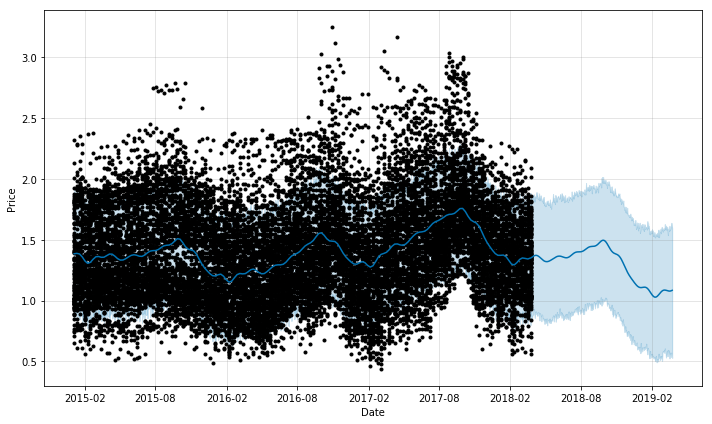

In [52]:
#시각화해보자

figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

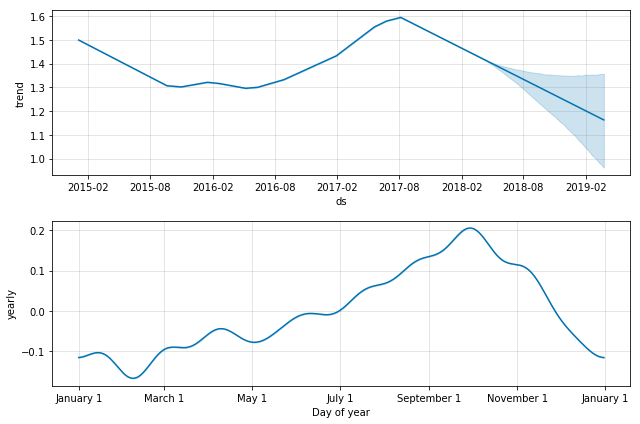

In [59]:
figure3 = m.plot_components(forecast)

In [60]:
# 다시 아포카도 csv를 가져와 df에 정의하자
avocado_df = pd.read_csv('avocado.csv')

# 실습 8. region 이 West 인 데이터만 가져옵니다.

In [61]:
avocado_df_sample = avocado_df[avocado_df['region'] == 'West']

In [62]:
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


# 실습 9. Date로 정렬합니다.

In [63]:
avocado_df_sample = avocado_df_sample.sort_values(by = 'Date', ascending = True)

In [64]:
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


# 실습 10. plot을 그립니다.  Date가 x축, AveragePrice 를 y축으로 그립니다.

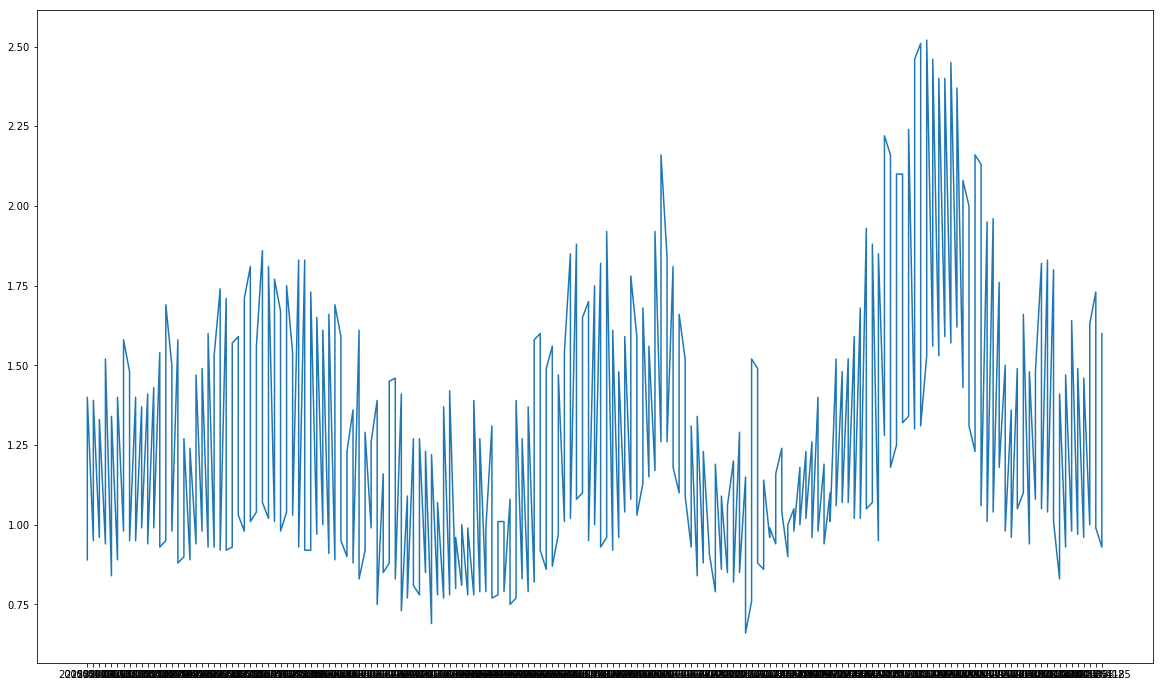

In [66]:
plt.figure(figsize=(20,12))

plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])


# 실습 11. 예측을 위해 컬럼명을 바꿉니다. Date 를 ds 로, AveragePrice 를 y 로 바꿉니다.

In [68]:
# 학습을 위해서 반드시 컬럼명을 x축 ds와 y축 y로 바꿔야함

avocado_df_sample = avocado_df_sample.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

# 실습 12. 데이터를 학습시킨 후, 365일치 데이터를 만든 후, forecast 변수에 예측한 값을 저장 하세요.

In [69]:
# m.fit : 학습시키라는 의미임
m = Prophet()
m.fit(avocado_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
future = m.make_future_dataframe(periods= 365)

In [71]:
forecast = m.predict(future)

# 실습 13. Prophet 의 plot 함수로 화면에 그래프로 나타내세요. (xlabel='Date', ylabel='Price' )

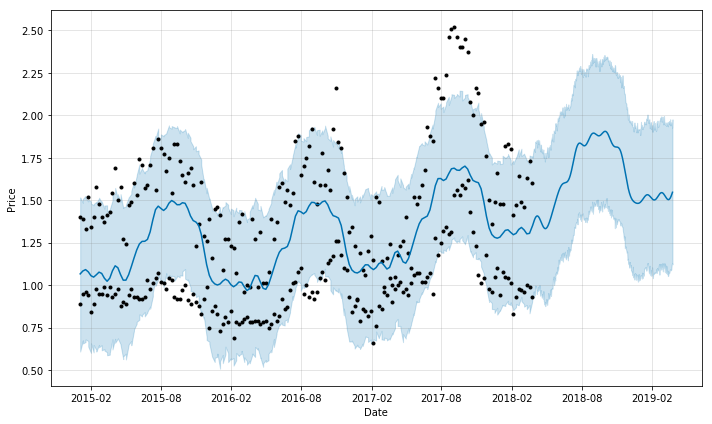

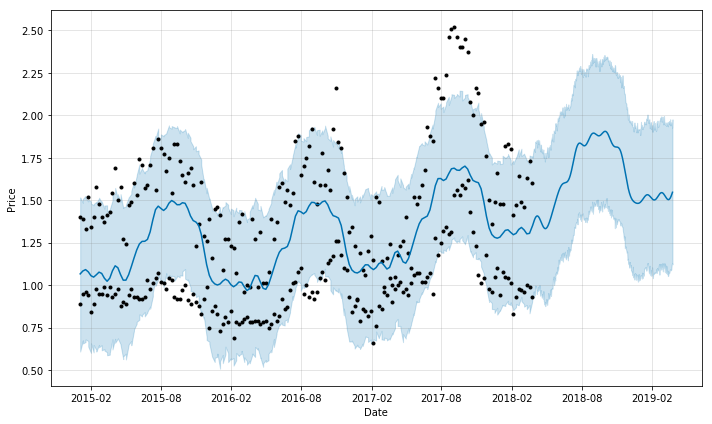

In [76]:
m.plot(forecast, xlabel='Date', ylabel='Price')

# 실습 14. 월별, 년도별 예측 그래프를 보여주세요.

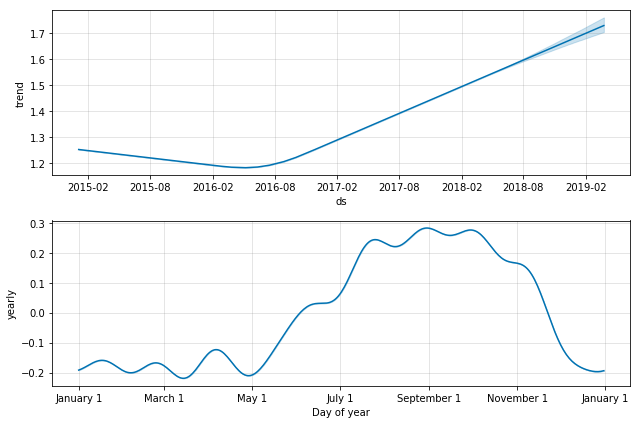

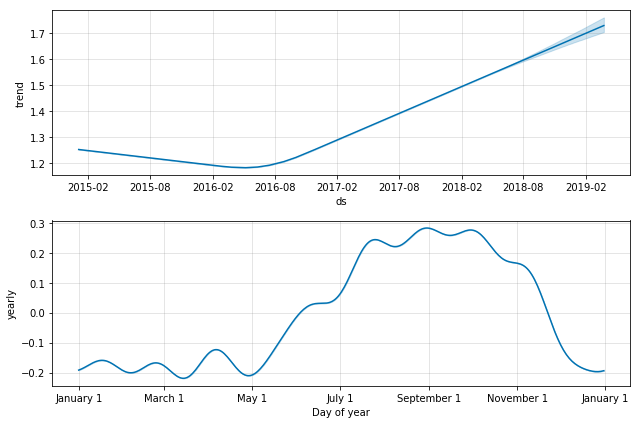

In [79]:
m.plot_components(forecast)

# GREAT JOB, KEEP UP THE GREAT WORK!